In [4]:
import pandas as pd 
import numpy as np
import os,csv
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, cross_validation
import tensorflow as tf
import seaborn as sns
import csv
from PIL import Image

In [3]:
#scenarios
Scenarios=pd.read_csv('/Users/user/Research/import_data/Scenarios_transient.csv')
Resource_usage=pd.read_csv('/Users/user/Research/import_data/resource_usage_for_NN.csv')
Scenarios

,case,KID1,KID3,KID5,KID7,KID9,KID11
0,1,case1,case2,case3,case4,case5,case6
1,2,case7502,case7891,case7018,case6660,case7182,case2455
2,3,case959,case1347,case6085,case3411,case6588,case7160
3,4,case5338,case6224,case2872,case6792,case47,case2440
4,5,case6851,case3293,case6534,case6965,case1069,case7186
5,6,case2604,case5369,case3862,case392,case402,case5902
6,7,case4599,case3673,case7244,case441,case7727,case6055
7,8,case1363,case3777,case2908,case2338,case1238,case5576
8,9,case8156,case3689,case2270,case2338,case528,case2704
9,10,case2773,case1054,case6048,case2926,case7847,case5278


In [225]:
Resource_usage.columns

Index(['﻿case1', 'Unnamed: 1', 'case2', 'Unnamed: 3', 'case3', 'Unnamed: 5',
       'case4', 'Unnamed: 7', 'case5', 'Unnamed: 9',
       ...
       'case8188', 'Unnamed: 16375', 'case8189', 'Unnamed: 16377', 'case8190',
       'Unnamed: 16379', 'case8191', 'Unnamed: 16381', 'case8192',
       'Unnamed: 16383'],
      dtype='object', length=16384)

In [226]:
Resource_usage

,﻿case1,Unnamed: 1,case2,Unnamed: 3,case3,Unnamed: 5,case4,Unnamed: 7,case5,Unnamed: 9,...,case8188,Unnamed: 16375,case8189,Unnamed: 16377,case8190,Unnamed: 16379,case8191,Unnamed: 16381,case8192,Unnamed: 16383
0,600,3,600,7,600,2,600,2,600,6,...,600,2,600,2,600,5,600,4,600,6
1,900,3,900,6,900,3,900,2,900,6,...,900,2,900,2,900,4,900,3,900,5
2,1200,2,1200,6,1200,2,1200,2,1200,6,...,1200,2,1200,3,1200,4,1200,4,1200,4
3,1500,2,1500,6,1500,3,1500,2,1500,6,...,1500,8,1500,5,1500,7,1500,5,1500,4
4,1800,2,1800,6,1800,2,1800,2,1800,6,...,1800,7,1800,2,1800,9,1800,2,1800,4
5,2100,3,2100,6,2100,2,2100,2,2100,7,...,2100,6,2100,3,2100,7,2100,3,2100,4


# CPU temperature and Fan Speed (transient version)

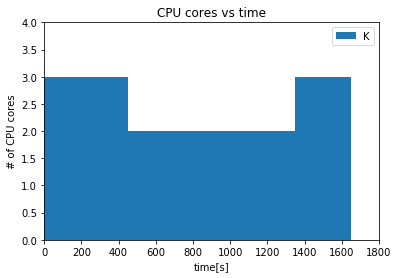

In [5]:
B=[0, 300, 600, 900, 1200, 1500]
sns.set
plt.bar(B,Resource_usage['Unnamed: 1'], width=300)
plt.xlabel("time[s]") 
plt.ylabel("# of CPU cores")
plt.title('CPU cores vs time')
plt.legend("KID1")
plt.xlim(0, 1800)
plt.ylim(0, 4)
plt.show()

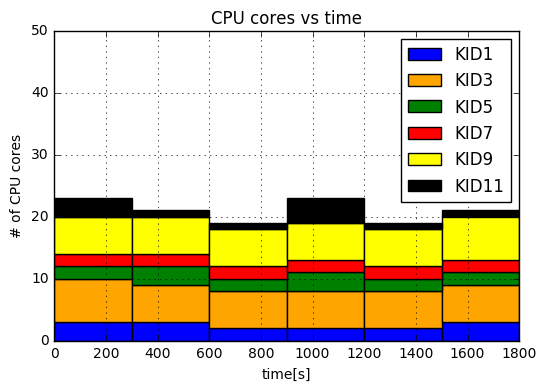

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [304]:
Times=[0, 300, 600, 900, 1200, 1500]
KID1=Resource_usage['Unnamed: 1']
KID3=Resource_usage['Unnamed: 3'] 
KID5=Resource_usage['Unnamed: 5']
KID7=Resource_usage['Unnamed: 7']
KID9=Resource_usage['Unnamed: 9']
KID11=Resource_usage['Unnamed: 11']

p1=plt.bar(Times, KID1, width=300, color="blue", label='KID1')
p2=plt.bar(Times, KID3, bottom=KID1,width=300, color="orange", label='KID3')
p3=plt.bar(Times, KID5, bottom=KID1+KID3, width=300, color="green")
p4=plt.bar(Times, KID7, bottom=KID1+KID3+KID5, width=300, color="red")
p5=plt.bar(Times, KID9, bottom=KID1+KID3+KID5+KID7, width=300, color="yellow")
p6=plt.bar(Times, KID11, bottom=KID1+KID3+KID5+KID7+KID9, width=300, color="black")

plt.grid(True)
plt.xlabel("time[s]") 
plt.ylabel("# of CPU cores")
plt.title('CPU cores vs time')
plt.xlim(0, 1800)
plt.ylim(0, 50)
plt.show()
plt.legend()
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ("KID1", "KID3", "KID5", "KID7", "KID9", "KID11"))

In [55]:
#Scenario1   
path='/Users/user/Research/transient/scenario1/'
collection=[]
FAN_Tra1=[]
CPU_TEMP=[]
FAN_TEMP=[]
CPU_TEMP_Tra1=[]
j=0

for i in range(1,13,2):
    try:
        num=str(i) 
        pathex=path+'NN_kid'+num+'_tra1.csv'
        collection.append(pathex)
    except:
        print(i, "error1")

for i in collection:
    j=0
    try:
        df = pd.read_csv(i)
        df=df.iloc[0:,1:2]
        df.column=['Values']
        l=len(df)
        
        for i in range(3,l,4):
            a=df.ix[i]
            b=df.ix[i+1]
            c=np.array((a+b)/2)
            FAN_TEMP.append(c)
            
        if len(FAN_TEMP)!=0:
            FAN_Tra1.append(FAN_TEMP)
        else:
            print(i,"error2")
        FAN_TEMP=[]
        
        for i in range(1,l,4):
            a=df.ix[i]
            b=df.ix[i+1]
            c=np.array((a+b)/2)
            CPU_TEMP.append(c)
        CPU_TEMP_Tra1.append(CPU_TEMP)
        CPU_TEMP=[]
        
        
    except:
        FAN_Tra1.append(0)
        CPU_TEMP_Tra1.append(0)
        print(i,"error3")
    j=j+1

In [83]:
pfd=pd.DataFrame(FAN_Tra1)
FAN_scenario1=pfd.T
FAN_scenario1=FAN_scenario1.rename(columns={'0' : 'fdf'})

pfd=pd.DataFrame(CPU_TEMP_Tra1)
CPU_scenario1=pfd.T
CPU_scenario1=CPU_scenario1.rename(columns={'0' : 'fdf'})

In [107]:
CPU_scenario1

,0,1,2,3,4,5
0,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
1,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
2,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
3,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
4,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
5,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
6,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
7,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
8,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]
9,[40.0],[40.0],[40.0],[40.0],[40.0],[40.0]


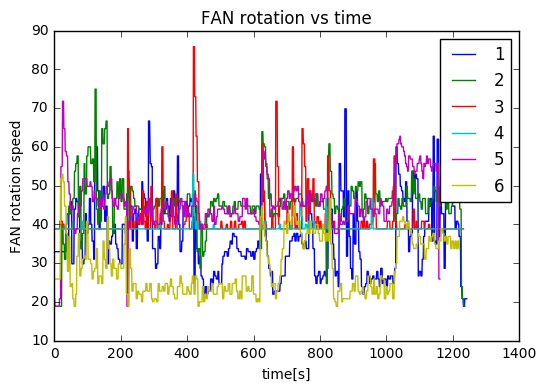

In [161]:
B=[]
l=len(FAN_scenario1[0])

for i in range(1,l+1):
    B.append(i)
    
    
plt.plot(B,FAN_scenario1[0])
plt.plot(B,FAN_scenario1[1])
plt.plot(B,FAN_scenario1[2])
plt.plot(B,FAN_scenario1[3])
plt.plot(B,FAN_scenario1[4])
plt.plot(B,FAN_scenario1[5])

plt.xlabel("time[s]") 
plt.ylabel("FAN rotation speed")
plt.title('FAN rotation vs time')

plt.legend("123456")
plt.show()

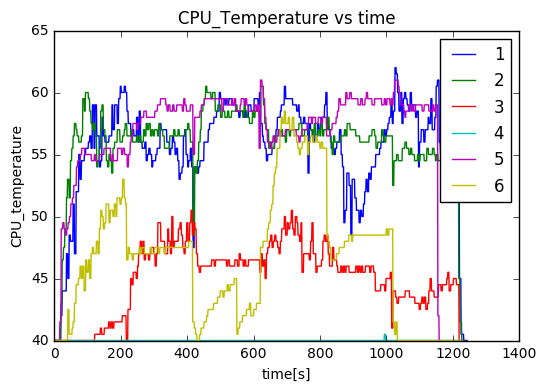

In [159]:
B=[]
l=len(CPU_scenario1[0])

for i in range(1,l+1):
    B.append(i)
    
    
plt.plot(B,CPU_scenario1[0])
plt.plot(B,CPU_scenario1[1])

plt.plot(B,CPU_scenario1[2])
plt.plot(B,CPU_scenario1[3])

plt.plot(B,CPU_scenario1[4])
plt.plot(B,CPU_scenario1[5])


plt.xlabel("time[s]") 
plt.ylabel("CPU_temperature")
plt.title('CPU_Temperature vs time')

plt.legend("123456")
plt.show()

In [148]:
#outlet temperature

dff=pd.read_csv('/Users/user/Research/transient/scenario1/exit_air/summary.csv', header=None)

dff

,0,1,2,3,4,5,6
0,﻿0,50.0,35.5,2017/09/01 21:32,NaN,34.5,35.4
1,3,50.0,35.4,2017/09/01 21:32,NaN,34.2,35.4
2,6,50.0,35.3,2017/09/01 21:32,NaN,34.2,35.3
3,9,50.0,35.3,2017/09/01 21:32,NaN,34.2,35.1
4,12,50.0,35.2,2017/09/01 21:32,NaN,34.2,35.1
5,15,50.0,35.2,2017/09/01 21:32,NaN,34.0,35.1
6,18,50.0,35.5,2017/09/01 21:32,NaN,34.1,35.4
7,21,50.0,35.6,2017/09/01 21:32,NaN,34.2,35.4
8,24,50.0,35.5,2017/09/01 21:32,NaN,34.2,35.5
9,27,50.0,35.5,2017/09/01 21:32,NaN,34.2,35.5


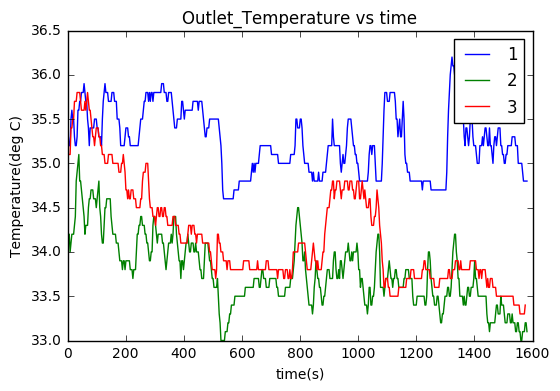

In [364]:
Times=[]
k=len(dff)
for i in range(0, 1584, 3):
    Times.append(i)

plt.plot(Times, dff[2][2:530])
plt.plot(Times, dff[5][2:530])
plt.plot(Times, dff[6][2:530])

plt.xlabel("time(s)") 
plt.ylabel("Temperature(deg C)")
plt.title('Outlet_Temperature vs time')

plt.legend("123")
plt.show()

In [358]:
len(dff[2][2:530])

528

In [357]:
len(Times)

528

# Scenario2

In [ ]:
Times=[0, 300, 600, 900, 1200, 1500]
KID1=Resource_usage['Unnamed: 1']
KID3=Resource_usage['Unnamed: 3'] 
KID5=Resource_usage['Unnamed: 5']
KID7=Resource_usage['Unnamed: 7']
KID9=Resource_usage['Unnamed: 9']
KID11=Resource_usage['Unnamed: 11']

p1=plt.bar(Times, KID1, width=300, color="blue", label='KID1')
p2=plt.bar(Times, KID3, bottom=KID1,width=300, color="orange", label='KID3')
p3=plt.bar(Times, KID5, bottom=KID1+KID3, width=300, color="green")
p4=plt.bar(Times, KID7, bottom=KID1+KID3+KID5, width=300, color="red")
p5=plt.bar(Times, KID9, bottom=KID1+KID3+KID5+KID7, width=300, color="yellow")
p6=plt.bar(Times, KID11, bottom=KID1+KID3+KID5+KID7+KID9, width=300, color="black")

plt.grid(True)
plt.xlabel("time[s]") 
plt.ylabel("# of CPU cores")
plt.title('CPU cores vs time')
plt.xlim(0, 1800)
plt.ylim(0, 50)
plt.show()
plt.legend()
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ("KID1", "KID3", "KID5", "KID7", "KID9", "KID11"))

In [151]:
#Scenario2   
path='/Users/user/Research/transient/scenario2/'
collection=[]
FAN_Tra2=[]
CPU_TEMP=[]
FAN_TEMP=[]
CPU_TEMP_Tra2=[]
j=0

for i in range(1,13,2):
    try:
        num=str(i) 
        pathex=path+'NN_kid'+num+'_tra2.csv'
        collection.append(pathex)
    except:
        print(i, "error1")

for i in collection:
    j=0
    try:
        df = pd.read_csv(i)
        df=df.iloc[0:,1:2]
        df.column=['Values']
        l=len(df)
        
        for i in range(3,l,4):
            a=df.ix[i]
            b=df.ix[i+1]
            c=np.array((a+b)/2)
            FAN_TEMP.append(c)
            
        if len(FAN_TEMP)!=0:
            FAN_Tra2.append(FAN_TEMP)
        else:
            print(i,"error2")
        FAN_TEMP=[]
        
        for i in range(1,l,4):
            a=df.ix[i]
            b=df.ix[i+1]
            c=np.array((a+b)/2)
            CPU_TEMP.append(c)
        CPU_TEMP_Tra2.append(CPU_TEMP)
        CPU_TEMP=[]
        
        
    except:
        FAN_Tra2.append(0)
        CPU_TEMP_Tra2.append(0)
        print(i,"error3")
    j=j+1

pfd=pd.DataFrame(FAN_Tra2)
FAN_scenario2=pfd.T
FAN_scenario2=FAN_scenario1.rename(columns={'0' : 'fdf'})

pfd=pd.DataFrame(CPU_TEMP_Tra2)
CPU_scenario2=pfd.T
CPU_scenario2=CPU_scenario1.rename(columns={'0' : 'fdf'})

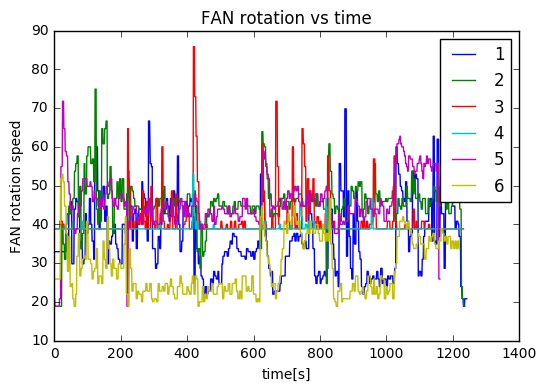

In [157]:
B=[]
l=len(FAN_scenario2[0])

for i in range(1,l+1):
    B.append(i)
    
    
plt.plot(B,FAN_scenario2[0])
plt.plot(B,FAN_scenario2[1])
plt.plot(B,FAN_scenario2[2])
plt.plot(B,FAN_scenario2[3])
plt.plot(B,FAN_scenario2[4])
plt.plot(B,FAN_scenario2[5])

plt.xlabel("time[s]") 
plt.ylabel("FAN rotation speed")
plt.title('FAN rotation vs time')

plt.legend("123456")
plt.show()

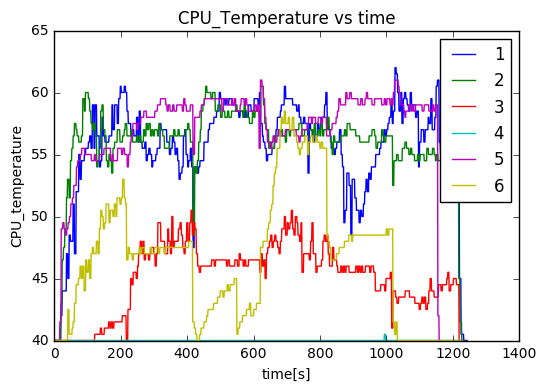

In [158]:
B=[]
l=len(CPU_scenario2[0])

for i in range(1,l+1):
    B.append(i)
    
    
plt.plot(B,CPU_scenario2[0])
plt.plot(B,CPU_scenario2[1])

plt.plot(B,CPU_scenario2[2])
plt.plot(B,CPU_scenario2[3])

plt.plot(B,CPU_scenario2[4])
plt.plot(B,CPU_scenario2[5])


plt.xlabel("time[s]") 
plt.ylabel("CPU_temperature")
plt.title('CPU_Temperature vs time')

plt.legend("123456")
plt.show()